Figure 6: A: Reference fold shape of a sinusoidal fold with inconsistent polarity shown by the direction of the arrows located at the
observations. B: Fold rotation angle reference curve and the calculated rotation angle showing the effect of polarity on the sign of
the calculated rotation angle. C: S-Variogram showing a high nugget effect due to the incorrect polarity for 7 observations. Dashed
line indicates the estimated fold wavelength. D: Interpolated fold shape without polarity correction. E: Interpolated fold rotation
curve without polarity correction. F: Violin plot showing wavelength prior and posterior for (D) and (E). G: Interpolated fold shape
showing corrected polarity using Eq. (3), observation polarity has been corrected. H: Interpolated fold rotation curve using Eq. (3),
dashed lines show the data points that have been corrected and the black dots indicate the corrected fold rotation values. I: Violin
plot showing the wavelength prior and posterior distributions for (G) and (H).

In [2]:
import matplotlib.pylab as plt
import numpy as np
from scipy.stats import norm
import matplotlib as mpl

from fold import *
import math
import pymc as pymc
from bayesian_fourier_series import *
#mpl.rcParams.update({'font.size': 18})

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def plot_normal(ii,jj,x,y,foldr,scale=8):
    x1 = x + scale*np.cos(np.deg2rad(foldr+90))#*get_aspect(fig.ax[ii][jj])
    y1 = y + scale*np.sin(np.deg2rad(foldr+90))/get_aspect(fig.ax[ii][jj])
    for i in range(len(foldr)):
        fig.ax[ii][jj].annotate("",
                xy=(x1[i],y1[i]), xycoords='data',
                xytext=(x[i], y[i]), textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"),)
        
from operator import sub

def get_aspect(ax=None):
    if ax is None:
        ax = plt.gca()
    fig = ax.figure

    ll, ur = ax.get_position() * fig.get_size_inches()
    width, height = ur - ll
    axes_ratio = height / width
    data_ratio = sub(*ax.get_ylim()) / sub(*ax.get_xlim())
    aspect = axes_ratio/data_ratio#ax.get_data_ratio()

    return aspect        

In [23]:
np.random.seed(2020)

In [24]:
#setup a reference fold
wl2 = 150.
N = 100
foldfourier2 = fourierFold(30,80,wl2,0,40,20,20)
x_ = np.linspace(0,300,300)
x  = np.arange(0, 150,1)#np.linspace(0,150,100)
#x = np.hstack([x,np.arange(100,200)])
np.random.shuffle(x)
N = 20
x = x[:N]
xb = x
fold= (foldfourier2.pos(x_))#+foldfourier.pos(x_)
foldpts = (foldfourier2.pos(x))#+foldfourier.pos(x)
x__ = x_
foldrot = np.arctan(np.gradient(fold))

foldrot*=180.0/np.pi
#now do the pol
a = np.random.choice([1,1,1,1,1,1,-1,1,-1,1],N)
#    foldrot*=a
#x_ = []
#y_ = []

#add some noise to the x and y observations - simulate some uncertainty
for i in range(1):
    xx1, yy1 = shake_xy(x,foldrot[x]*a,5)
#   if mixture:
#        yy1*=a
#    x_.append(xx1)
#    y_.append(yy1)
#plt.plot(x,foldrot[x],'ro')
#plt.figure()
fourierseries = bayesian_fourier_series_model(xx1,yy1,1)
fourierseries.add_reference_foldshape(x_,fold)
fourierseries.add_reference_foldlocations(x,foldpts)
fourierseries.add_reference_foldprofile(x_,foldrot)
fourierseries.find_wavelength()
#fourierseries.wavelengths= [140.]
print fourierseries.wavelengths
print len(a[a==-1]), len(a)


165.6 157.32
[161.45999999999998]
6 20


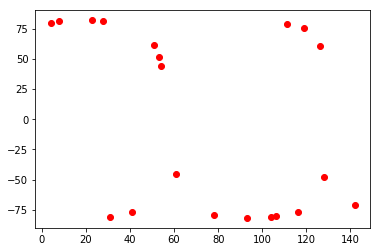

In [25]:
plt.plot(xx1,yy1,'ro')
#plt.plot(x,foldrot[xb],'bo')

In [26]:
fourierseries = bayesian_fourier_series_model(xx1,yy1,1)
fourierseries.add_reference_foldshape(x_,fold)
fourierseries.add_reference_foldlocations(x,foldpts)
fourierseries.add_reference_foldprofile(x_,foldrot)
fourierseries.find_wavelength()
#fourierseries.wavelengths= [140.]
print fourierseries.wavelengths
print len(a[a==-1]), len(a)
#if len()
#fourierseries.wavelengths.append(200.)
#sv = s_variogram(x,foldrot[x])
#sv.setup()
#sv.find_wavelengths()
#plt.plot(sv.lags,sv.variance)

#plt.figure()
#print fourierseries.semivariogram.lags, fourierseries.semivariogram.variance
#plt.plot(fourierseries.semivariogram.lags,fourierseries.semivariogram.variance,'bo')
#print fourierseries.wavelengthss from Hongfu. I think they are the more expensive seller but I am absolutely stunned by quality and workmanship of the frame so it was worth the premium. 
#fourierseries.wavelengths[1] = 180.
fourierseries.setup_inference()
#fourierseries.find_map()
fourierseries.run_sampler(10000,5000)

fourierseries_corrected = bayesian_fourier_series_model(xx1,yy1,1)
fourierseries_corrected.add_reference_foldshape(x_,fold)
fourierseries_corrected.add_reference_foldlocations(x,foldpts)
fourierseries_corrected.add_reference_foldprofile(x_,foldrot)
fourierseries_corrected.find_wavelength()
#fourierseries_corrected.wavelengths= [140.]
print fourierseries_corrected.wavelengths
print len(a[a==-1]), len(a)
#if len()
#fourierseries.wavelengths.append(200.)
#sv = s_variogram(x,foldrot[x])
#sv.setup()
#sv.find_wavelengths()
#plt.plot(sv.lags,sv.variance)

#plt.figure()
#print fourierseries.semivariogram.lags, fourierseries.semivariogram.variance
#plt.plot(fourierseries.semivariogram.lags,fourierseries.semivariogram.variance,'bo')
#print fourierseries.wavelengths
#fourierseries.wavelengths[1] = 180.
fourierseries_corrected.setup_inference_mixture()
#fourierseries.find_map()
fourierseries_corrected.run_sampler(10000,5000)
#scores = pymc.geweke(fourierseries.S, intervals=7)
#pymc.Matplot.geweke_plot(scores)
#pymc.Matplot.geweke_plot(pymc.geweke(fourierseries.S.trace('c_0')[:,]))

165.6 157.32
[161.45999999999998]
6 20
 [-----------------100%-----------------] 10000 of 10000 complete in 15.0 sec165.6 157.32
[161.45999999999998]
6 20
 [-----------------100%-----------------] 10000 of 10000 complete in 51.4 sec

True

1
2


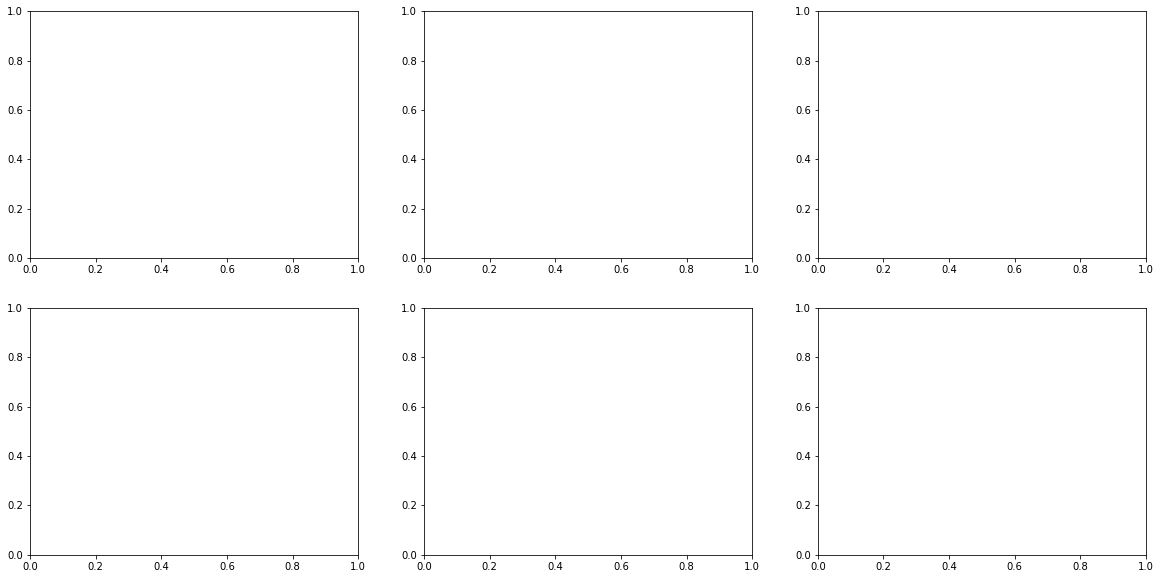

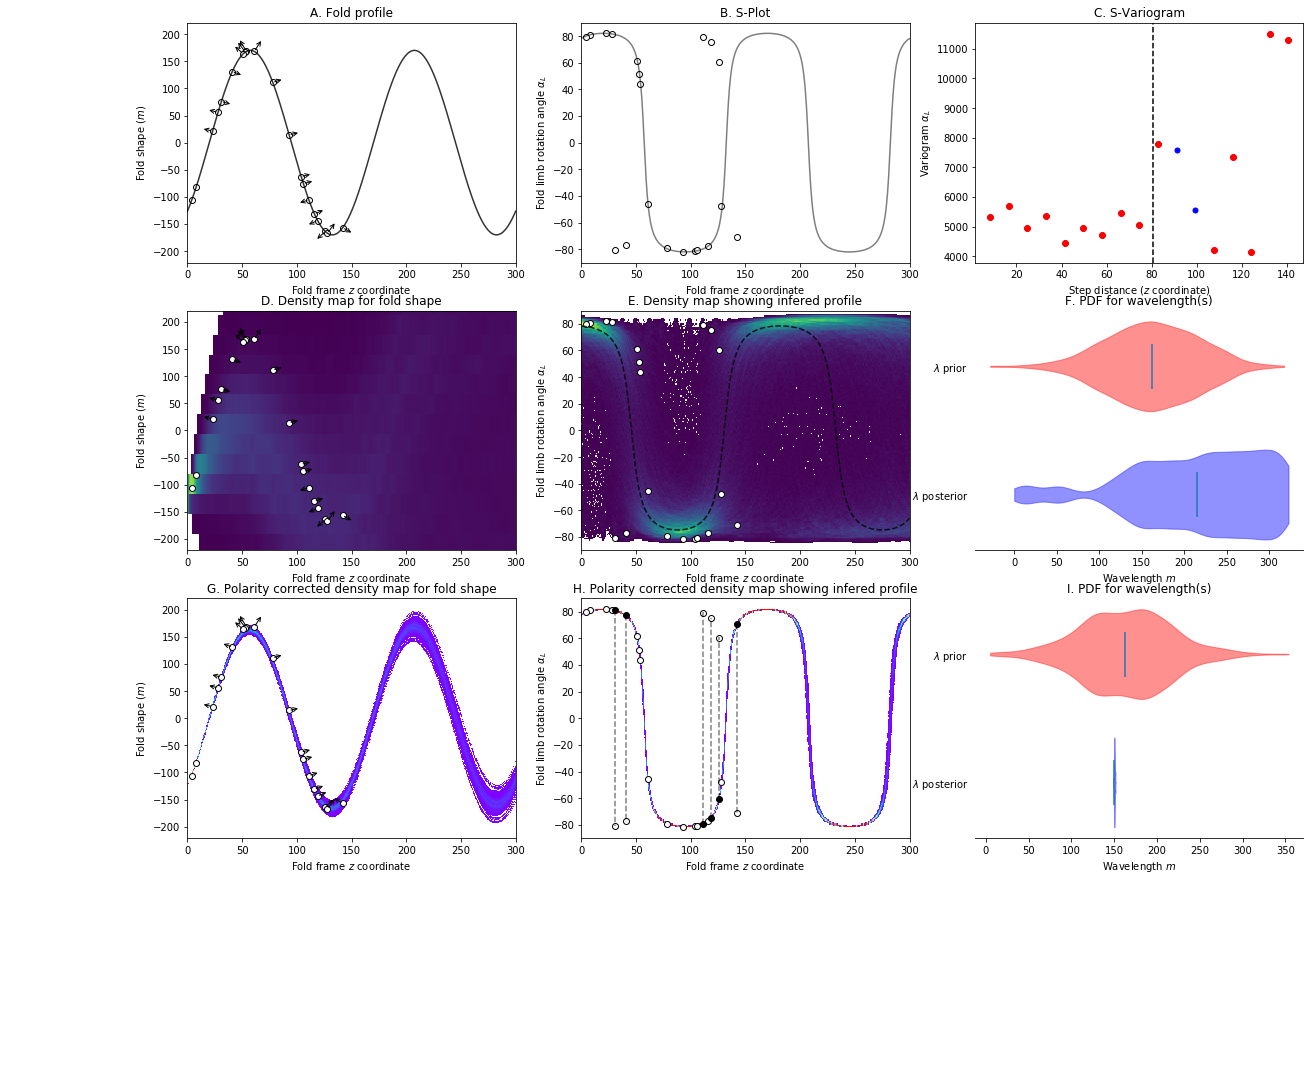

In [27]:
fig = bayesian_fourier_series_figure(fourierseries)
fig.fig, fig.ax = plt.subplots(3,3,figsize=(20,15))
#fourierseries.semivariogram.
fig.plot_variogram()
fig.plot_reference_fold_points()
fig.plot_reference_fold_points('ko',0,1)
#fig.plot_reference_fold_shape('b-',0,1)
fig.plot_reference_fold_points('ko',0,2)
correction = a < 0#
correction = correction.astype(int)*180
#fig.plot_reference_fold_shape('b-',0,1)
plot_normal(0,0,xb,foldpts,foldrot[xb]+correction,10)
plot_normal(1,0,xb,foldpts,foldrot[xb]+correction,10)
plot_normal(2,0,xb,foldpts,foldrot[xb],10)

fig.plot_reference_fold_profile()
fig.plot_reference_fold_profile_points()
fig.plot_reference_fold_profile_points('ko',1,1)
fig.plot_reference_fold_profile_points('ko',1,2)
fig.ax[2][1].plot(xb[a<0],foldrot[xb[a<0]],'ko')
fig.ax[2][1].plot([xb[a<0],xb[a<0]],[foldrot[xb[a<0]],-foldrot[xb[a<0]]],color='black',linestyle='dashed',alpha=0.5)
#fig.plot_reference_fold_profile('b-',1,1)

fig.plot_reference_fold_shape()
fig.ax[0][0].set_title(r'A. Fold profile')
fig.ax[0][1].set_title(r'B. S-Plot')
fig.ax[0][2].set_title(r'C. S-Variogram')

fig.ax[1][1].set_title(r'E. Density map showing infered profile')
fig.ax[1][0].set_title(r'D. Density map for fold shape')
fig.ax[1][2].set_title(r'F. PDF for wavelength(s)')

fig.ax[2][1].set_title(r'H. Polarity corrected density map showing infered profile')
fig.ax[2][0].set_title(r'G. Polarity corrected density map for fold shape')
fig.ax[2][2].set_title(r'I. PDF for wavelength(s)')

fig.ax[0][0].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[0][1].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[2][0].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[2][1].set_xlabel(r'Fold frame $z$ coordinate')

fig.ax[0][2].set_xlabel(r'Step distance ($z$ coordinate)')

fig.ax[1][2].set_xlabel(r'Wavelength $m$')
fig.ax[2][2].set_xlabel(r'Wavelength $m$')

#g.ax[1][2].set_ylabel(r'Probability')

fig.ax[2][1].set_ylabel(r'Fold limb rotation angle $\alpha_L$')
fig.ax[0][1].set_ylabel(r'Fold limb rotation angle $\alpha_L$')

fig.ax[0][2].set_ylabel(r'Variogram $\alpha_L$')

fig.ax[1][0].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[1][0].set_ylabel(r'Fold shape ($m$)')
fig.ax[0][0].set_ylabel(r'Fold shape ($m$)')
fig.ax[2][0].set_ylabel(r'Fold shape ($m$)')

fig.ax[1][1].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[1][1].set_ylabel(r'Fold limb rotation angle $\alpha_L$')
H2 = fig.plot_curve_density(0,300)
fig.plot_fold_heat_map(fig.fourier_series_model.reference_fold_y[0])
intercept = fig.fourier_series_model.reference_fold_y[0]
#for i in range(10):
#    c, w = fig.plot_random_curve(i)
#print c,w
fig.plot_map(0,300,'k--')
#print ,fig.fourier_series_model.map.qw[1].value
colours = ['b-','r-']
#for i in range(len(fig.fourier_series_model.wavelengths)):
temp = fig.ax[0][0]
i = 0

arrays = []
pos = []
labels = []
c = len(fourierseries.wavelengths)/2
for i in range(len(fourierseries.wavelengths)):
    arrays.append(np.random.normal(fourierseries.wavelengths[i],fourierseries.wavelengths[i]/3.,1000))
    labels.append(r"$\lambda$ prior")
    pos.append(c)
    c-=1
    arrays.append(fourierseries.S.trace('qw_%i'%i)[:][:])
    labels.append(r"$\lambda$ posterior")

    pos.append(c)
    c-=1
fig.plot_violin(1,2,labels,pos,arrays)
arrays = []
pos = []
labels = []
c = len(fourierseries_corrected.wavelengths)/2
for i in range(len(fourierseries_corrected.wavelengths)):
    arrays.append(np.random.normal(fourierseries_corrected.wavelengths[i],fourierseries_corrected.wavelengths[i]/3.,1000))
    labels.append(r"$\lambda$ prior")
    pos.append(c)
    c-=1
    arrays.append(fourierseries_corrected.S.trace('qw_%i'%i)[:][:])
    labels.append(r"$\lambda$ posterior")

    pos.append(c)
    c-=1
#make image for second model
model = fourierseries_corrected
wavelength_number = len(model.wavelengths)
C_ =  []
i = 0
C_.append(model.S.trace('c_%i' %(i))[:])
i+=1
for _ in range (2*model.N*wavelength_number):
    print i
    C_.append(model.S.trace('c_%i' %(i))[:])
    i+=1
qw = []
for x in range(wavelength_number):
    qw.append(model.S.trace('qw_%i' %x)[:])
ends_ = (model.xmax-model.xmin)*2
xmin = 0
xmax = 300
x = np.linspace(xmin,xmax,600)
v = np.array((C_[0][:,None]))
#v.fill(0.0)
for w in range(wavelength_number):
    for i in range(1,model.N+1):
        v = v + C_[(2*i-1)+2*model.N*w][:,None]*\
        np.cos(2*np.pi/qw[w][:,None] * i * x) + C_[(2*i)+2*model.N*w][:,None]\
        *np.sin(2*np.pi/qw[w][:,None] * i * x)
v = np.arctan(v)*180.0/np.pi
x = x
#ymin = -90
#ymax = 90
x_f = np.tile(x,len(qw[0]))
y_f = v.flatten()
vv = np.linspace(-90,90,180)

H = np.zeros((len(x),len(vv)))
for i in range(len(x)):
    for j in range(len(v)):
        vind = np.nonzero(np.abs(vv-v[j][i]) == np.min(np.abs(vv-v[j][i])))[0]
        H[i,vind[0]]+=1
H/=len(qw[0])
H[H==0.] = np.nan
# = np.abs(np.log(H))
im= fig.ax[2][1].imshow((np.rot90(H)), cmap='rainbow', extent=[xmin, xmax, -90, 90],aspect='auto')
fig.plot_violin(2,2,labels,pos,arrays)
#plt.tight_layout()

pr_ = []

for i in range(len(qw[0])):            
    y = v[i]
    gradient = np.tan(y*np.pi/180.)
    #start all points at xmin = 0
    step = x[1] - x[0]
    p = []
    for i in range(len(x)):
        if not p:
            p.append(intercept)
            continue
        else:
            if i == (len(x) - 1):
                p_ = p[len(p)-1] + ((gradient[i-1]+gradient[i]) / 2.) * step
            else:
                p_ = p[len(p)-1] + ((gradient[i-1]+gradient[i+1]) / 2.) * step
            p.append(p_)
    pr_.append(p)

#plt.plot(self.x,p)


x_f = np.tile(x,len(qw[0]))
y_f = np.array(pr_).flatten()
miny = min(y_f)
maxy = max(y_f)
miny*=1.2
maxy*=1.2
vv = np.linspace(miny,maxy,360)
H = np.zeros((len(x),len(vv)))
for i in range(len(x)):
    for j in range(len(pr_)):
        vind = np.nonzero(np.abs(vv-pr_[j][i]) == np.min(np.abs(vv-pr_[j][i])))[0]
        H[i,vind[0]]+=1
H/=len(qw[0])
H[H==0]=np.nan
fig.ax[2][0].imshow((np.rot90(H)), extent=[xmin,xmax, miny, maxy],cmap='rainbow',aspect='auto')
fig.ax[2][0].set_ylim(min(model.reference_fold_y)*1.3,max(model.reference_fold_y)*1.3)

for i in range(3):
    for j in range(2):
        fig.ax[i][j].set_xlim(0,300)
for i in range(1,3):
    fig.ax[i][2].spines['top'].set_visible(False)
    fig.ax[i][2].spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    fig.ax[i][2].spines['left'].set_visible(False)
    fig.ax[i][2].tick_params(top='off', bottom='on', left='off', right='off', labelleft='on', labelbottom='on')